# Visualising and Analysing the Labelled CiteSeer Network Dataset
## Build the Graph

In [1]:
from igraph import *

n_vertices = 3264

# Create graph
g = Graph()

# Add vertices
g.add_vertices(n_vertices)

edges = []
weights = []

with open("citeseer.edges", "r") as edges_file:
    line = edges_file.readline()
    
    while line != "":
        
        strings = line.rstrip().split(",")
        
        # Add edge to edge list
        edges.append(((int(strings[0])-1), (int(strings[1])-1)))
        
        # Add weight to weight list
        weights.append(float(strings[2]))
        
        
        line = edges_file.readline()

# Add edges to the graph
g.add_edges(edges)

# Add weights to edges in the graph
g.es['weight'] = weights

## Visualise the Graph

In [2]:
out_fig_name = "graph.eps"

visual_style = {}

# Define colors used for outdegree visualization
colours = ['#fecc5c', '#a31a1c']

# Set bbox and margin
visual_style["bbox"] = (3000,3000)
visual_style["margin"] = 17

# Set vertex colours
visual_style["vertex_color"] = 'grey'

# Set vertex size
visual_style["vertex_size"] = 20

# Set vertex lable size
visual_style["vertex_label_size"] = 8

# Don't curve the edges
visual_style["edge_curved"] = False

# Set the layout
my_layout = g.layout_fruchterman_reingold()
visual_style["layout"] = my_layout

# Plot the graph
plot(g, out_fig_name, **visual_style)

## Visualise the Graph according to Labels

In [3]:
n_classes = 6

bins = [[] for x in range(n_classes)]

with open("citeseer.node_labels", "r") as labels_file:
    line = labels_file.readline()
    
    while line != "":
        
        strings = line.rstrip().split(",")
        
        vertex_id = int(strings[0])-1
        bin_id = int(strings[1])-1
        bins[bin_id].append(vertex_id)
        
        line = labels_file.readline()

In [4]:
node_colours = []

for i in range(n_vertices):
    if i in bins[0]:
        node_colours.append("green")
    elif i in bins[1]:
        node_colours.append("yellow")
    elif i in bins[2]:
        node_colours.append("red")
    elif i in bins[3]:
        node_colours.append("blue")
    elif i in bins[4]:
        node_colours.append("orange")
    elif i in bins[5]:
        node_colours.append("pink")
    else:
        node_colours.append("grey")

out_fig_name = "labelled_graph.eps"

g.vs["color"] = node_colours

visual_style = {}

# Define colors used for outdegree visualization
colours = ['#fecc5c', '#a31a1c']

# Set bbox and margin
visual_style["bbox"] = (3000,3000)
visual_style["margin"] = 17

# Set vertex size
visual_style["vertex_size"] = 20

# Set vertex lable size
visual_style["vertex_label_size"] = 8

# Don't curve the edges
visual_style["edge_curved"] = False

# Set the layout
visual_style["layout"] = my_layout

# Plot the graph
plot(g, out_fig_name, **visual_style)

## Analyse the Graph

In [5]:
print("Number of vertices:", g.vcount())
print("Number of edges:", g.ecount())
print("Density of the graph:", 2*g.ecount()/(g.vcount()*(g.vcount()-1)))

Number of vertices: 3264
Number of edges: 4536
Density of the graph: 0.000851796434172811


In [6]:
degrees = []
total = 0

for n in range(n_vertices):
    neighbours = g.neighbors(n, mode='ALL')
    total += len(neighbours)
    degrees.append(len(neighbours))
    
print("Average degree:", total/n_vertices)
print("Maximum degree:", max(degrees))
print("Vertex ID with the maximum degree:", degrees.index(max(degrees)))

Average degree: 2.7794117647058822
Maximum degree: 99
Vertex ID with the maximum degree: 2906


Degree having the maximum number of vertices: 1
Number of vertices having the most abundant degree: 1321


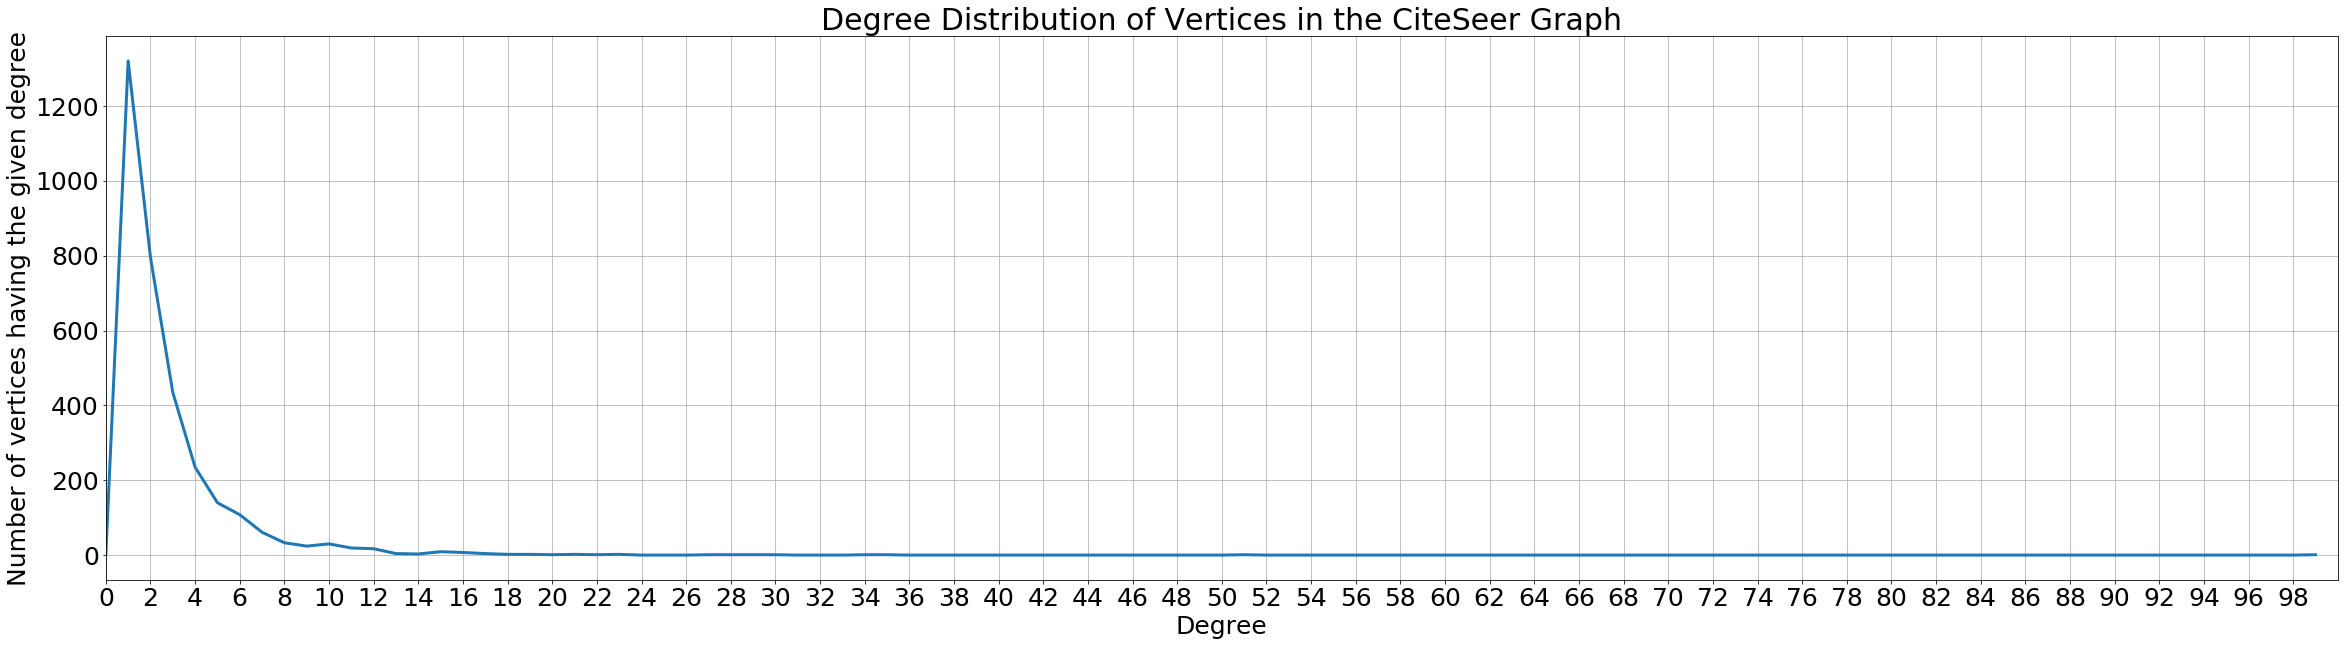

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 25})

x = [x for x in range(max(degrees)+1)]
degree_counts = [0 for x in range(100)]

for i in degrees:
    degree_counts[i] += 1

print("Degree having the maximum number of vertices:", degree_counts.index(max(degree_counts)))
print("Number of vertices having the most abundant degree:", max(degree_counts))

plt.figure(figsize=(40,10))
plt.plot(x, degree_counts, linewidth=3.0)
plt.ylabel('Number of vertices having the given degree')
plt.xlabel('Degree')
plt.title('Degree Distribution of Vertices in the CiteSeer Graph')

plt.xlim(0,100)
plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.grid(True)
plt.savefig('degree_distribution.png', bbox_inches='tight')
plt.show()
plt.draw()

In [13]:
# Source: https://stackoverflow.com/questions/34219481/python-igraph-finding-number-of-triangles-for-each-vertex

cliques = g.cliques(min=3, max=3)
triangle_count = [0] * g.vcount()
for i, j, k in cliques:
    triangle_count[i] += 1
    triangle_count[j] += 1
    triangle_count[k] += 1

print("Average number of triangles:", sum(triangle_count)/g.vcount())
print("Maximum number of triangles:", max(triangle_count))
print("Vertex ID with the maximum number of triangles:", triangle_count.index(max(triangle_count)))

Average number of triangles: 1.0716911764705883
Maximum number of triangles: 85
Vertex ID with the maximum number of triangles: 2906


In [14]:
print("Diameter of the graph:", g.diameter())

Diameter of the graph: 28


In [15]:
# Source: https://snipplr.com/view/9914

def assortativity(graph, degrees=None):
    if degrees is None: degrees = graph.degree()
    degrees_sq = [deg**2 for deg in degrees]
 
    m = float(graph.ecount())
    num1, num2, den1 = 0, 0, 0
    for source, target in graph.get_edgelist():
        num1 += degrees[source] * degrees[target]
        num2 += degrees[source] + degrees[target]
        den1 += degrees_sq[source] + degrees_sq[target]
 
    num1 /= m
    den1 /= 2*m
    num2 = (num2 / (2*m)) ** 2
 
    return (num1 - num2) / (den1 - num2)

print("Assortativity of the graph:", assortativity(g))

Assortativity of the graph: 0.04806382149471062
